# **Convolutional Neural Networks: Street View Housing Number Digit Recognition**

Welcome to the project on classification using Convolutional Neural Networks. We will continue to work with the Street View Housing Numbers (SVHN) image dataset for this project.

--------------
### **Context:** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
### **Objective:**
----------------

Build a CNN model that can identify the digits in the images.

-------------
### **Dataset**
-------------
Here we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been done.

## **Mount the drive**
Let us start by mounting the drive and importing the necessary libraries.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical

Let us check for the version of TensorFlow.

In [ ]:
print(tf.__version__)

2.6.0


## **Load the dataset**
- Let us now load the dataset that is available as a .h5 file.
- Split the data into train and the test dataset

In [ ]:
import h5py

# Open the file as read only
# User can make changes in the path as required
h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

Let's check the number of images in the training and testing data.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observations**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualizing images**
- Use X_train to visualize the first 10 images
- Use Y_train to print the first 10 labels

#### **Visualize the first 10 images from the training data**

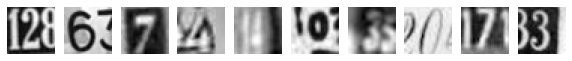

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# Visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## **Data Preparation**

- Print the first image in the train image and figure out the shape of the images
- Reshape the train and the test dataset to make them fit the first convolutional operation that we will create later. Figure out the required shape
- Normalize the train and the test dataset by dividing by 255
- Print the new shapes of the train and the test set
- One-hot encode the target variable

In [ ]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Reshaping the dataset to flatten them.
# Remember that we always have to give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0], 32,32,1)
X_test = X_test.reshape(X_test.shape[0], 32,32,1)

In [ ]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


#### **One-hot encoding the labels in the target variable y_train and y_test**

In [ ]:
# One-hot encoding the output
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Print the testing data labels
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

- Notice that each entry of y_test is a one-hot encoded vector instead of a single label.

## **Model Building**

Now, we have done data preprocessing, let's build a CNN model.

In [ ]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First Convolutional layer with **16 filters and kernel size of 3x3**. Use the **'same' padding** and provide an **apt input shape**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes** and **softmax activation**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model
- Call the function and store the model in a new variable
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 32, verbose = 1, and 20 epochs**. Store the model building history to use later for visualization.

#### **Building and training a CNN model as per the architecture mentioned above**

In [ ]:
# Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

# Define the function
def cnn_model_1():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence:

    # First convolutional layer
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
    # Adding leaky relu activation function with negative slope of 0.1
    model.add(LeakyReLU(0.1))
    # Second convolutional layer
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    # Adding another leaky relu activation function with negative slope of 0.1
    model.add(LeakyReLU(0.1))
    # Adding max pooling to reduce the size of output of second conv layer
    model.add(MaxPool2D(pool_size=(2, 2)))
    # Flattening the 3-D output of the conv layer after max pooling to make it 
    # ready for creating dense connections
    model.add(Flatten())
    # Adding a fully connected dense layer with 32 neurons    
    model.add(Dense(32))
    # Adding another leaky relu activation function with negative slope of 0.1
    model.add(LeakyReLU(0.1))
    # Adding the output layer with 10 neurons and activation functions as softmax
    # since this is a multi-class classification problem
    model.add(Dense(10, activation='softmax'))

    # Declare an adam optimizer with learning rate of 0.001 
    adam = optimizers.Adam(learning_rate=0.001)
    
    # Compile the model
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
# Build the model
model_1 = cnn_model_1()

In [ ]:
# Print the model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 16)        160       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 32)               

In [ ]:
# Fit the model
history_model_1 = model_1.fit(X_train,
                              y_train,
                              epochs=20,
                              validation_split=0.2,
                              batch_size=32,
                              verbose=1)

Epoch 1/20
1050/1050 [==============================] - 41s 9ms/step - loss: 1.1355 - accuracy: 0.6273 - val_loss: 0.6829 - val_accuracy: 0.8018
Epoch 2/20
1050/1050 [==============================] - 9s 9ms/step - loss: 0.5769 - accuracy: 0.8331 - val_loss: 0.5619 - val_accuracy: 0.8382
Epoch 3/20
1050/1050 [==============================] - 10s 9ms/step - loss: 0.4788 - accuracy: 0.8596 - val_loss: 0.5315 - val_accuracy: 0.8502
Epoch 4/20
1050/1050 [==============================] - 9s 9ms/step - loss: 0.4116 - accuracy: 0.8801 - val_loss: 0.4663 - val_accuracy: 0.8669
Epoch 5/20
1050/1050 [==============================] - 9s 9ms/step - loss: 0.3644 - accuracy: 0.8919 - val_loss: 0.4742 - val_accuracy: 0.8680
Epoch 6/20
1050/1050 [==============================] - 9s 9ms/step - loss: 0.3200 - accuracy: 0.9049 - val_loss: 0.4681 - val_accuracy: 0.8695
Epoch 7/20
1050/1050 [==============================] - 9s 9ms/step - loss: 0.2879 - accuracy: 0.9146 - val_loss: 0.5148 - val_accurac

### **Plotting the validation and training accuracies**

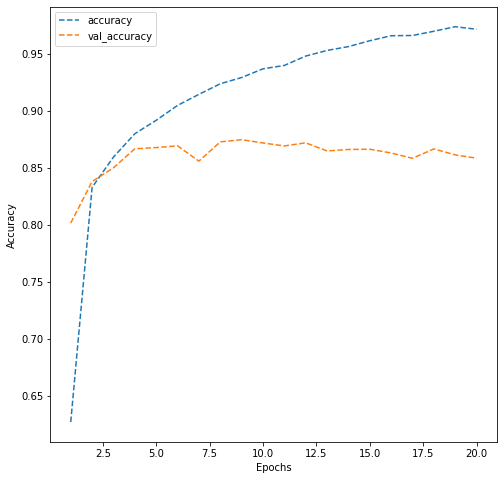

In [ ]:
# Plot the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**
- The model has performed poorly on the validation data. The validation data has become practically constant afer only 4 epochs.
- Since the training accuracy is extremely high, the model is likely overfitting the training data.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clear the backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators for future replication
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First Convolutional layer with **16 filters and kernel size of 3x3**. Use the **'same' padding** and provide an **apt input shape**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and kernel size of 3x3 with 'same' padding** 
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add a **dropout layer with rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes** and **softmax activation**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model
- Call the function and store the model in a new variable
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and 30 epochs**. Store the model building history to use later for visualization.

#### **Building and traininig the second CNN model as per the architecture mentioned above**

In [ ]:
#Define the function
def cnn_model_2():
    model = Sequential() 
    # Add layers as per the architecture mentioned above in the same sequence:
    
    # First convolutional layer
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
    # Adding leaky relu activation function with negative slope of 0.1
    model.add(LeakyReLU(0.1))
    # Second convolutional layer
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    # Adding another leaky relu activation function with negative slope of 0.1
    model.add(LeakyReLU(0.1))
    # Adding max pooling to reduce the size of output of second conv layer
    model.add(MaxPool2D(pool_size=(2, 2)))
    # Adding a Batch normalization layer
    model.add(BatchNormalization())
    # Third convolutional layer
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    # Adding leaky relu activation function with negative slope of 0.1
    model.add(LeakyReLU(0.1))
    # Fourth convolutional layer
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
    # Adding leaky relu activation function with negative slope of 0.1
    model.add(LeakyReLU(0.1))
    # Adding max pooling to reduce the size of output of second conv layer
    model.add(MaxPool2D(pool_size=(2, 2)))
    # Adding a Batch normalization layer
    model.add(BatchNormalization())
    # Flattening the 3-D output of the conv layer after max pooling to make it 
    # ready for creating dense connections
    model.add(Flatten())
    # Adding a fully connected dense layer with 32 neurons    
    model.add(Dense(32))
    # Adding another leaky relu activation function with negative slope of 0.1
    model.add(LeakyReLU(0.1))
    # We will be switching 50% of neurons randomly at each iteration to avoid overfitting
    model.add(Dropout(0.5))
    # Adding the output layer with 10 neurons and activation functions as softmax
    # since this is a multi-class classification problem
    model.add(Dense(10, activation='softmax'))

    # Declare adam optimizer with learning rate of 0.001 
    adam = optimizers.Adam(learning_rate=0.001)
    
    # Compile the model
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
# Build the model
model_2 = cnn_model_2()

In [ ]:
# Print the summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        160       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9

In [ ]:
# Fit the model
history_model_2 = model_2.fit(X_train,
                              y_train,
                              epochs=30,
                              validation_split=0.2,
                              batch_size=128,
                              verbose=1)

Epoch 1/30
263/263 [==============================] - 7s 22ms/step - loss: 1.4622 - accuracy: 0.5025 - val_loss: 2.7942 - val_accuracy: 0.2100
Epoch 2/30
263/263 [==============================] - 5s 20ms/step - loss: 0.6979 - accuracy: 0.7842 - val_loss: 0.5575 - val_accuracy: 0.8323
Epoch 3/30
263/263 [==============================] - 5s 20ms/step - loss: 0.5593 - accuracy: 0.8297 - val_loss: 0.4990 - val_accuracy: 0.8581
Epoch 4/30
263/263 [==============================] - 5s 20ms/step - loss: 0.5023 - accuracy: 0.8465 - val_loss: 0.4825 - val_accuracy: 0.8586
Epoch 5/30
263/263 [==============================] - 5s 20ms/step - loss: 0.4563 - accuracy: 0.8613 - val_loss: 0.4731 - val_accuracy: 0.8624
Epoch 6/30
263/263 [==============================] - 5s 21ms/step - loss: 0.4196 - accuracy: 0.8710 - val_loss: 0.4478 - val_accuracy: 0.8810
Epoch 7/30
263/263 [==============================] - 5s 21ms/step - loss: 0.3912 - accuracy: 0.8813 - val_loss: 0.4875 - val_accuracy: 0.8629

### **Plotting the validation and training accuracies**

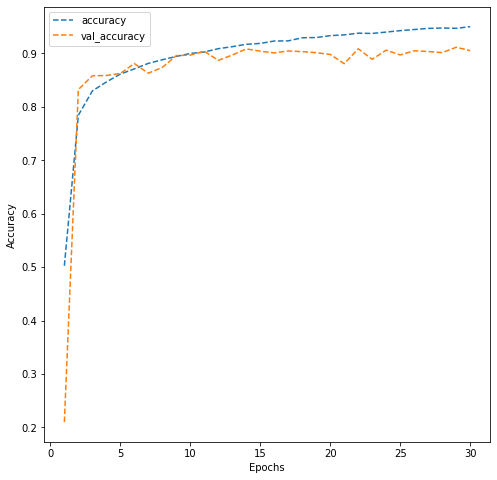

In [ ]:
# Plot the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**
- It looks like we have corrected the distance between the validation and training accuracies.
- It looks like adding a few more layers as well as a dropout layer reduced overfitting significantly.
- The model still may be slightly overfit, but with validation accuracy sitting around **88%** and training accuracy at **91%** this looks to be close enough for what we are aiming for.

## **Predictions on the test data**

- Make predictions on the test set using the second model
- Print the obtained results using the classification report and the confusion matrix
- Final observations from the obtained results

In [ ]:
# Make a prediction on the test data using this second model 
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

**Note:** Earlier, we noticed that each entry of the test data is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Converting each entry to single label from a one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

#### **Final observations on the performance of the model on the test data**

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1814
           1       0.92      0.90      0.91      1828
           2       0.95      0.90      0.92      1803
           3       0.92      0.87      0.90      1719
           4       0.92      0.93      0.93      1812
           5       0.91      0.90      0.91      1768
           6       0.87      0.91      0.89      1832
           7       0.88      0.96      0.92      1808
           8       0.90      0.90      0.90      1812
           9       0.89      0.91      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



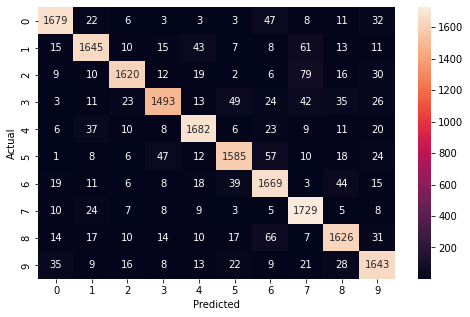

In [ ]:
# Import required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Print the classification report
print(classification_report(y_test, test_pred))

# Plot the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### **Observations:**
- According the the classification report, we are achieving recall values **higher than 87%** for all classes.
- We are also seeing an overall accuracy of **91%**.
- In the confusion matrix, we see that we are able to acheive an accurate reading an overwhelming majority of the time.
- The second model seems to have performed very well against the test data.